<a href="https://colab.research.google.com/github/putricinto/Machine-Learning-Project/blob/master/Assignment_06_W07_Data_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x

In [0]:
import pandas as pd
import numpy as np
from scipy import stats
import sys
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from tensorflow import feature_column


In [89]:
url = 'https://raw.githubusercontent.com/putricinto/Machine-Learning-Project/master/bank.csv'
bank = pd.read_csv(url)
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [90]:
#Define Type of Features
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

# **Descriptive Statistics**

In [0]:
#Changing Day Variable into object
bank['day'] = bank['day'].astype(str)

In [92]:
bank.describe()

,age,balance,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,3881.000000,63.000000,854.000000,58.000000


# **Data Visualization**

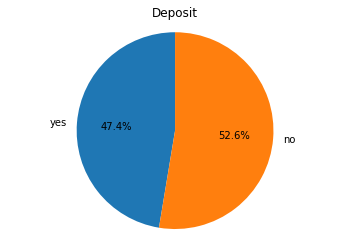

In [93]:
#Pie Chart of Deposit Variable (Label)
y=list(bank['deposit'])
labels = 'yes', 'no'
sizes = [y.count('yes'), y.count('no')]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Deposit')

plt.show()

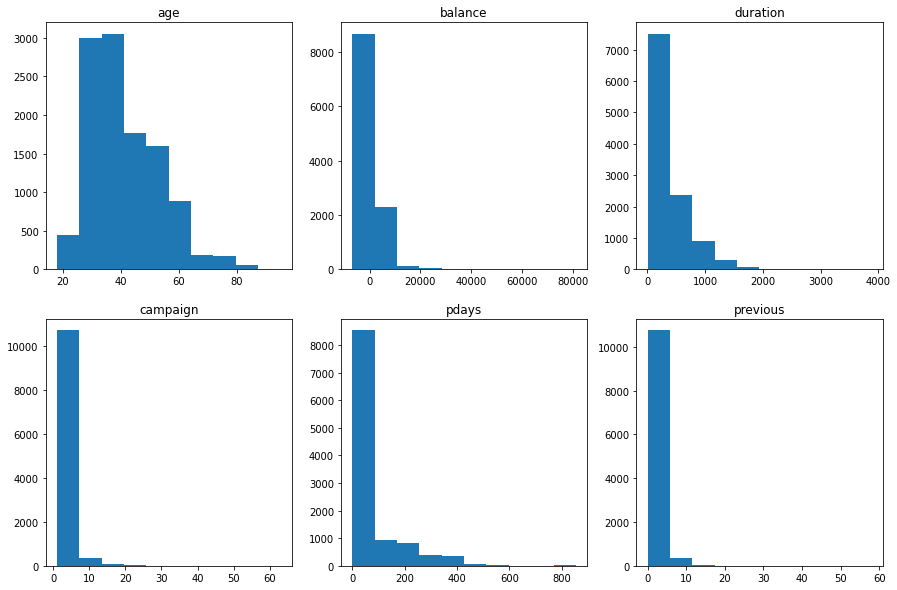

In [94]:
#Histogram of Numerical Variables
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

colors = ['pink']
axs[0, 0].hist(bank['age'])
axs[0, 0].set_title('age')

axs[0, 1].hist(bank['balance'])
axs[0, 1].set_title('balance')

axs[0, 2].hist(bank['duration'])
axs[0, 2].set_title('duration')

axs[1, 0].hist(bank['campaign'])
axs[1, 0].set_title('campaign')

axs[1, 1].hist(bank['pdays'])
axs[1, 1].set_title('pdays')

axs[1, 2].hist(bank['previous'])
axs[1, 2].set_title('previous')

plt.show()

# **Data Cleansing**

**Dealing with outliers**

In [95]:
bank1=bank.copy()
for i in bank1.columns:
  if bank1[i].dtypes == 'O':
    bank1=bank1.drop([i],1)
bank1.head()

,age,balance,duration,campaign,pdays,previous
0,59,2343,1042,1,-1,0
1,56,45,1467,1,-1,0
2,41,1270,1389,1,-1,0
3,55,2476,579,1,-1,0
4,54,184,673,2,-1,0


In [96]:
z=np.abs(stats.zscore(bank1._get_numeric_data()))
print(z)
bank=bank[(z<3).all(axis=1)]
print(bank.shape)

[[1.49150488 0.25252514 1.93022589 0.55416834 0.48118405 0.36325984]
 [1.23967567 0.4599736  3.15461161 0.55416834 0.48118405 0.36325984]
 [0.0194704  0.0801603  2.92990082 0.55416834 0.48118405 0.36325984]
 ...
 [0.77495804 0.46493443 0.62225823 0.18678537 0.48118405 0.36325984]
 [0.14841574 0.47392593 1.04575164 0.18678537 1.10957066 1.81833188]
 [0.6070719  0.47392593 0.73753015 0.55416834 0.48118405 0.36325984]]
(10098, 17)


**Correcting typos**

In [97]:
#Checking if there are typos or not for cetgorical fatures
unique_value=[]
column_name=[]
#Correcting Typos
for i in bank.columns:
  if bank[i].dtypes == 'O':
    value_categorical=bank[i].unique()
    unique_value.append(value_categorical)
    column_name.append(i)
    print('Variable',i,'and its unique value are',value_categorical)

Variable job and its unique value are ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
Variable marital and its unique value are ['married' 'single' 'divorced']
Variable education and its unique value are ['secondary' 'tertiary' 'primary' 'unknown']
Variable default and its unique value are ['no' 'yes']
Variable housing and its unique value are ['yes' 'no']
Variable loan and its unique value are ['no' 'yes']
Variable contact and its unique value are ['unknown' 'cellular' 'telephone']
Variable day and its unique value are ['5' '6' '7' '8' '9' '12' '13' '14' '15' '16' '19' '20' '21' '23' '26'
 '27' '28' '29' '30' '2' '3' '4' '11' '17' '18' '24' '1' '10' '22' '25'
 '31']
Variable month and its unique value are ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Variable poutcome and its unique value are ['unknown' 'other' 'failure' 'success']
Variable deposit and its 

**Grouping sparse classes**

In [0]:
#Because Day Variable has large number of distinct values, we can change into week
bank['day'] = bank['day'].astype(int)
def week(row):
    if row['day']<=7:
        val = 'week 1'
    elif 7<row['day']<=14:
        val = 'week 2'
    elif 14<row['duration']<=21:
        val = 'week 3'
    else:
        val = 'week 4'
    return val
bank['week'] = bank.apply(week, axis=1)
bank=bank.drop('day',1)

**Dropping Duplicates**

In [99]:
#Dropping Duplicate Value
bank = bank.drop_duplicates()
bank.shape

(10098, 17)

# **Data Transformation**

**Scaling**

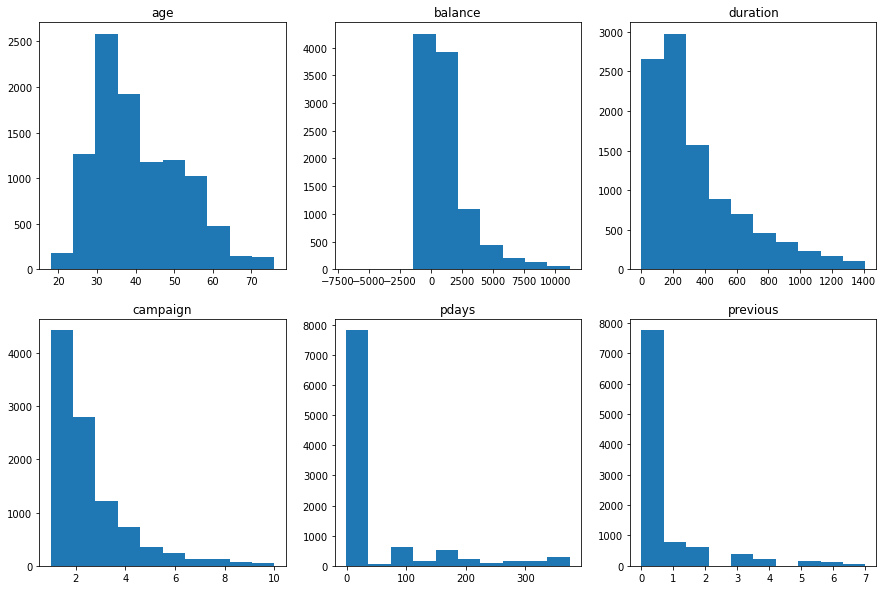

In [100]:
#Histogram of Numerical Variables
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

colors = ['pink']
axs[0, 0].hist(bank['age'])
axs[0, 0].set_title('age')

axs[0, 1].hist(bank['balance'])
axs[0, 1].set_title('balance')

axs[0, 2].hist(bank['duration'])
axs[0, 2].set_title('duration')

axs[1, 0].hist(bank['campaign'])
axs[1, 0].set_title('campaign')

axs[1, 1].hist(bank['pdays'])
axs[1, 1].set_title('pdays')

axs[1, 2].hist(bank['previous'])
axs[1, 2].set_title('previous')

plt.show()

In [101]:
bank1=bank.copy()
for i in bank1.columns:
  if bank1[i].dtypes == 'O':
    bank1=bank1.drop([i],1)
bank1.shape

(10098, 6)

In [102]:
bank1.describe()

,age,balance,duration,campaign,pdays,previous
count,10098.000000,10098.000000,10098.000000,10098.000000,10098.000000,10098.000000
mean,40.713409,1233.583878,349.452664,2.246286,42.568132,0.593286
std,11.181180,1840.318704,291.533203,1.691887,91.737769,1.334833
min,18.000000,-6847.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,113.000000,137.000000,1.000000,-1.000000,0.000000
50%,38.000000,519.500000,251.000000,2.000000,-1.000000,0.000000
75%,49.000000,1603.500000,479.000000,3.000000,-1.000000,0.000000
max,76.000000,11174.000000,1410.000000,10.000000,375.000000,7.000000


In [0]:
bank_skew=pd.DataFrame()
bank_skew['age']=np.sqrt(bank['age'])
bank_skew['balance']=bank['balance']
bank_skew['duration']=np.sqrt(bank['duration'])
bank_skew['campaign']=bank['campaign']
bank_skew['pdays']=bank['pdays']
bank_skew['previous']=bank['previous']

**Scaling**

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xnorm=scaler.fit_transform(bank1)
xnorm=pd.DataFrame(xnorm)

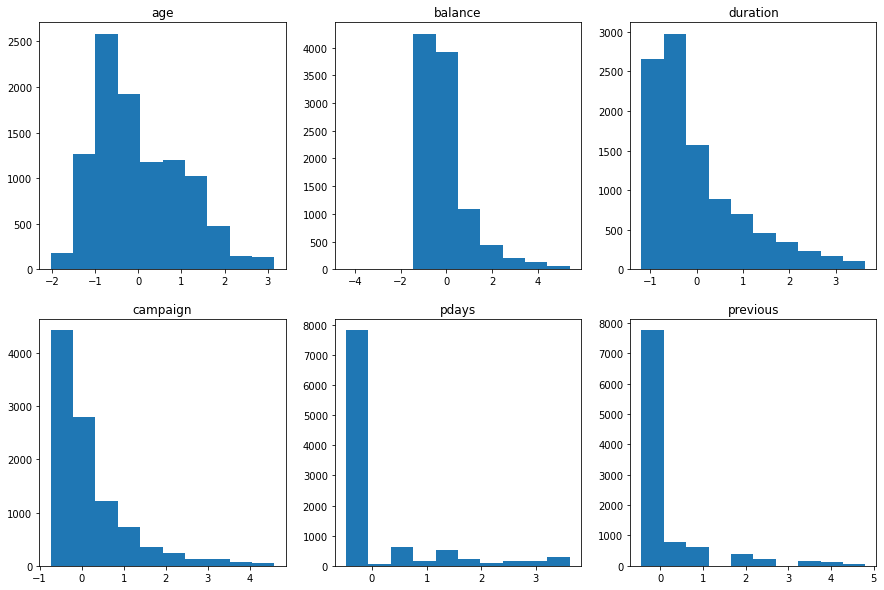

In [105]:
#Histogram of Numerical Variables
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

colors = ['pink']
axs[0, 0].hist(xnorm[0])
axs[0, 0].set_title('age')

axs[0, 1].hist(xnorm[1])
axs[0, 1].set_title('balance')

axs[0, 2].hist(xnorm[2])
axs[0, 2].set_title('duration')

axs[1, 0].hist(xnorm[3])
axs[1, 0].set_title('campaign')

axs[1, 1].hist(xnorm[4])
axs[1, 1].set_title('pdays')

axs[1, 2].hist(xnorm[5])
axs[1, 2].set_title('previous')

plt.show()

In [0]:
bank=bank.drop(['age','pdays','previous','balance','campaign','duration'],1)
bank=np.array(bank)
bank=pd.DataFrame(bank)

In [0]:
bank['age']=xnorm[0]
bank['balance']=xnorm[1]
bank['duration']=xnorm[2]
bank['campaign']=xnorm[3]
bank['pdays']=xnorm[4]
bank['previous']=xnorm[5]

In [0]:
bank=bank.rename(columns={0:'job',1:'marital',2:'education',3:'default',4:'housing',5:'loan',6:'contact',7:'month',8:'poutcome',9:'deposit',10:'week'})

In [109]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10098 entries, 0 to 10097
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   job        10098 non-null  object 
 1   marital    10098 non-null  object 
 2   education  10098 non-null  object 
 3   default    10098 non-null  object 
 4   housing    10098 non-null  object 
 5   loan       10098 non-null  object 
 6   contact    10098 non-null  object 
 7   month      10098 non-null  object 
 8   poutcome   10098 non-null  object 
 9   deposit    10098 non-null  object 
 10  week       10098 non-null  object 
 11  age        10098 non-null  float64
 12  balance    10098 non-null  float64
 13  duration   10098 non-null  float64
 14  campaign   10098 non-null  float64
 15  pdays      10098 non-null  float64
 16  previous   10098 non-null  float64
dtypes: float64(6), object(11)
memory usage: 1.3+ MB


In [0]:
bank['deposit'] = bank['deposit'].replace('yes', 1)
bank['deposit'] = bank['deposit'].replace('no', 0)

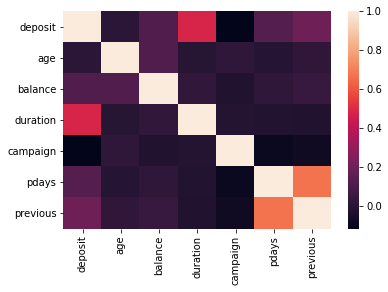

In [111]:
sns.heatmap(bank.corr())

**Categorical encoding**

In [0]:
dict_of_feature_column = {}
for i in bank.columns:
  #for Categorical Features That Only Contain 'Yes' and 'No'-> 1 & 0
  if bank[i].unique().dtype == np.object:
    if ('yes' and 'no' in bank[i].unique()) and (len(bank[i].unique()) == 2):
      bank[i] = bank[i].replace('yes', 1)
      bank[i] = bank[i].replace('no', 0)
      dict_of_feature_column[i] = feature_column.numeric_column(i)
    elif i=='education':
      bank[i]=bank[i].replace({'unknown':0,'primary': 1, 'secondary': 2, 'tertiary': 3 })
      dict_of_feature_column[i] = feature_column.numeric_column(i)
    else:
      temp = feature_column.categorical_column_with_vocabulary_list(i, bank[i].unique())
      dict_of_feature_column[i] = feature_column.indicator_column(temp)
    
  else:
    dict_of_feature_column[i] = feature_column.numeric_column(i)

In [113]:
dict_of_feature_column

{'age': NumericColumn(key='age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 'balance': NumericColumn(key='balance', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 'campaign': NumericColumn(key='campaign', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 'contact': IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='contact', vocabulary_list=('unknown', 'cellular', 'telephone'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 'default': NumericColumn(key='default', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 'deposit': NumericColumn(key='deposit', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 'duration': NumericColumn(key='duration', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 'education': NumericColumn(key='education', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 'housing': 